In [10]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, Dropout
from keras.models import Model
from keras.optimizers import SGD
from keras.preprocessing import image
import numpy as np
import os
from tensorflow.keras.callbacks import TensorBoard

from tensorflow.keras.models import load_model
import sys
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator



import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import itertools
import pickle


In [11]:
epochs = 15
img_size = 32
batch_size = 64

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


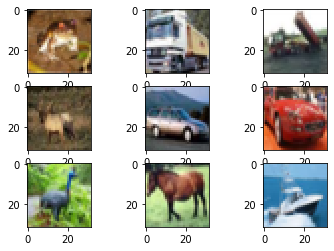

In [12]:
from keras.datasets import cifar10
# load dataset
#y = labels x = images
(trainX, trainY), (testX, testY) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i])
# show the figure
plt.show()

In [13]:
(trainX, trainY), (testX, testY) = cifar10.load_data()
trainY = to_categorical(trainY)
testY = to_categorical(testY)


In [14]:
# # load train and test dataset
# def load_dataset():
# 	# load dataset
# 	(trainX, trainY), (testX, testY) = cifar10.load_data()
# 	# one hot encode target value
# 	return trainX, trainY, testX, testY

# load_dataset()

In [15]:
# # scale pixels

# def prep_pixels(train, test):
# 	# convert from integers to floats
# 	train_norm = train.astype('float32')
# 	test_norm = test.astype('float32')
# 	# normalize to range 0-1
# 	train_norm = train_norm / 255.0
# 	test_norm = test_norm / 255.0
# 	# return normalized images
# 	return train_norm, test_norm

# prep_pixels(trainX, testX)


Sans Data Augmentation

In [16]:


model = Sequential()

model.add(Conv2D(16, kernel_size=3, activation='relu', strides=(1,1), padding='same', kernel_initializer='he_uniform', input_shape=(img_size, img_size,3))) # 5 ou 7 au dessus de 128
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(32, activation='relu'))


#Toujours à la fin
model.add(Flatten())
model.add(Dense(10, activation='softmax')) # > mettre le nombre de labels

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dense_2 (Dense)              (None, 16, 16, 32)        544       
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                81930     
Total params: 82,922
Trainable params: 82,922
Non-trainable params: 0
_________________________________________________________________


In [17]:
logdir = os.path.join("logs", "cnn_base")
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)
model.compile(optimizer='adam', metrics=['accuracy'], loss="categorical_crossentropy")


In [18]:
# fit model
datagen_first = ImageDataGenerator()
iterator = datagen_first.flow(trainX, trainY, batch_size=batch_size)
history = model.fit_generator(iterator, epochs=epochs, validation_data=(testX, testY), verbose=1, callbacks=[tensorboard_callback])

Epoch 1/15
  1/782 [..............................] - ETA: 0s - loss: 297.7355 - accuracy: 0.0938WARNING:tensorflow:From C:\Users\utilisateur\anaconda3\envs\tf\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
782/782 [==============================] - 32s 41ms/step - loss: 27.6613 - accuracy: 0.2762 - val_loss: 2.1241 - val_accuracy: 0.2506
Epoch 2/15
782/782 [==============================] - 33s 43ms/step - loss: 1.9681 - accuracy: 0.3145 - val_loss: 1.9688 - val_accuracy: 0.3264
Epoch 3/15
782/782 [==============================] - 38s 49ms/step - loss: 1.7524 - accuracy: 0.3825 - val_loss: 1.8964 - val_accuracy: 0.3583
Epoch 4/15
782/782 [==============================] - 29s 38ms/step - loss: 1.6322 - accuracy: 0.4233 - val_loss: 1.8769 - val_accuracy: 0.3615
Epoch 5/15
782/782 [=====================

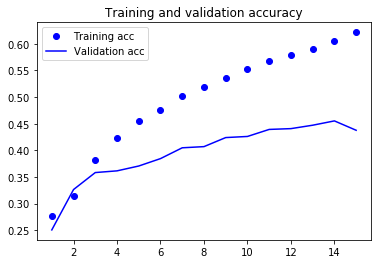

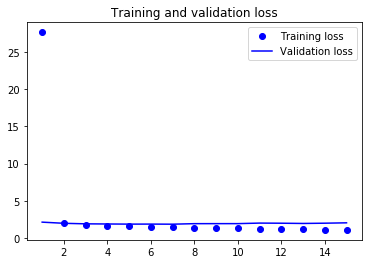

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(1, len(acc) + 1)

plt.plot(epoch, acc, 'bo', label='Training acc')
plt.plot(epoch, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epoch, loss, 'bo', label='Training loss')
plt.plot(epoch, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

On peut voir ci dessus que les courbes ne sont pas optimales.
La validation ne suit pas le training comme elle serait sensé le faire.

In [20]:
 # evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)

Avec Data Augmentation

In [21]:
# example of random rotation image augmentation


#Data augmentaiton 
model2 = Sequential()

model2.add(Conv2D(16, kernel_size=3, activation='relu', strides=(1,1), padding='same', kernel_initializer='he_uniform', input_shape=(img_size,img_size,3))) # 5 ou 7 au dessus de 128
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dense(32, activation='relu'))
#model.add(Dropout(0.2))

#Toujours à la fin
model2.add(Flatten())
model2.add(Dense(10, activation='softmax')) # > mettre le nombre de labels

model2.summary()
logdir = os.path.join("logs", "cnn_base2")
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)
model2.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])
              
# Data augmentation
datagen_da = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
iterator = datagen_da.flow(trainX, trainY, batch_size=batch_size)
history2 = model2.fit_generator(iterator, epochs=epochs, validation_data=(testX, testY), verbose=1, callbacks=[tensorboard_callback])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dense_4 (Dense)              (None, 16, 16, 32)        544       
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                81930     
Total params: 82,922
Trainable params: 82,922
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
782/782 [==============================] - 62s 80ms/step - loss: 32.8009 - accuracy: 0.2142 - val_loss: 2

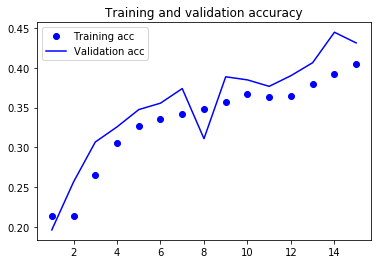

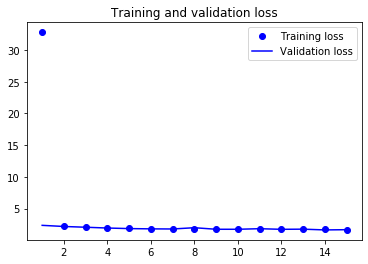

In [22]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epoch = range(1, len(acc) + 1)

plt.plot(epoch, acc, 'bo', label='Training acc')
plt.plot(epoch, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epoch, loss, 'bo', label='Training loss')
plt.plot(epoch, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

On peut voir ci dessus que les courbes sont bien plus collées malgrès l'accroc à l'epoch 8.